In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
#titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
#titles.head()

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [13]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-11-14
1,Ai no Sanka,1967,Japan,1967-01-01
2,A Thousand to One,1920,USA,1920-12-07
3,A Prince of a King,1923,USA,1923-10-13
4,A Prince of a King,1923,Netherlands,1924-08-08


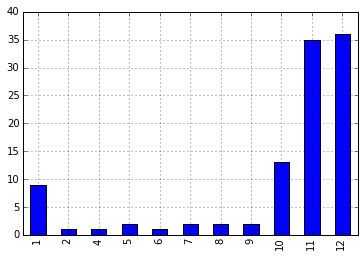

In [21]:
# Make a bar plot of the months in which movies
# with "Christmas" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

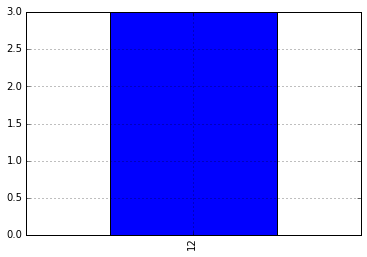

In [31]:
# Make a bar plot of the months in which movies
# whose titles start with "The Hobbit" are released in the USA.

rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

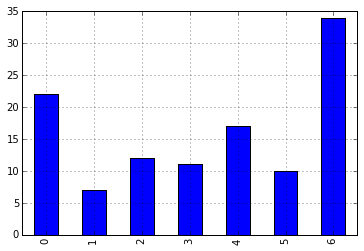

In [50]:
# Make a bar plot of the day of the week on which movies
# with "Romance" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Romance')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

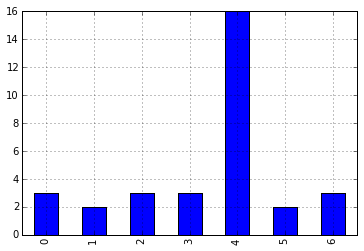

In [51]:
# Make a bar plot of the day of the week on which movies
# with "Action" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Action')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [65]:
# Build an indexed version of USA release dates
# from which several release dates can be fetched with .loc['Sleuth']
# and one release date can be fetched with .loc['Sleuth', 1972].

r = release_dates
r = r[r.country == 'USA']
r = r.set_index(['title', 'year']).sort_index()
rdi = r

In [66]:
rdi.head()

,,country,date
title,year,,
#Horror,2015,USA,2015-01-01
#Speedball,2015,USA,2015-01-01
#Stuck,2014,USA,2014-10-10
#iKllr,2014,USA,2014-01-01
$,1971,USA,1971-12-17


In [67]:
rdi.loc['Sleuth']

,country,date
year,,
1972,USA,1972-12-10


In [68]:
rdi.loc[('Sleuth', 1972)]

,,country,date
title,year,,
Sleuth,1972,USA,1972-12-10


In [80]:
# Use your newly indexed dataframe
# to fetch the release dates
# of every film in which Judi Dench has starred.

c = cast
c = c[c.name == 'Judi Dench']
c = c.join(rdi, ['title', 'year'])
c = c[c.date.notnull()]
c[['title', 'year', 'character', 'date']].sort('date')

,title,year,character,date
53106,A Study in Terror,1965,Sally,1966-08-10
3395832,Wetherby,1985,Marcia Pilborough,1985-07-19
3376597,84 Charing Cross Road,1987,Nora Doel,1987-02-13
3326219,A Handful of Dust,1988,Mrs. Beaver,1988-06-24
3406860,Henry V,1989,Mistress Nell Quickly,1989-11-08
1071380,GoldenEye,1995,M,1995-11-17
602139,Jack & Sarah,1995,Margaret,1996-03-22
3171595,Hamlet,1996,Hecuba,1996-12-25
1762165,Mrs Brown,1997,Queen Victoria,1997-07-18
1071383,Tomorrow Never Dies,1997,M,1997-12-19


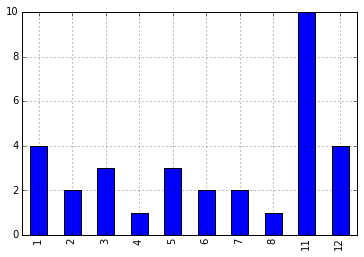

In [87]:
# In which months do films with Judi Dench tend to be released?

c = cast
c = c[c.name == 'Judi Dench']
c = c.join(rdi, ['title', 'year'])
c = c[c.date.notnull()]
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

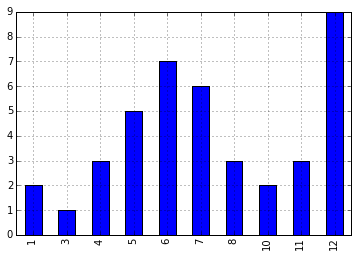

In [88]:
# In which months do films with Tom Cruise tend to be released?

c = cast
c = c[c.name == 'Tom Cruise']
c = c.join(rdi, ['title', 'year'])
c = c[c.date.notnull()]
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [171]:
# On the dates when films with Judi Dench were released,
# how did her `n` rank compare to the reigning rank of Michael Caine,
# based on the most recent film in which he had a non-null n value?

c = cast
c = c[c.name == 'Judi Dench']
c = c.join(rdi, ['title', 'year'])
c = c[c.date.notnull()]
c = c[['date', 'n']]
c = c.set_index('date').sort_index()
dench_ranks = c
dench_ranks

,n
date,
1966-08-10,8
1985-07-19,3
1987-02-13,3
1988-06-24,5
1989-11-08,26
1995-11-17,6
1996-03-22,3
1996-12-25,12
1997-07-18,1


In [172]:
# On the dates when films with Michael Caine were released,
# how did her `n` rank compare to the reigning rank of Tom Cruise,
# based on the most recent film in which he had a non-null n value?

c = cast
c = c[c.name == 'Michael Caine']
c = c.join(rdi, ['title', 'year'])
c = c[c.date.notnull()]
c = c[['date', 'n']]
c = c.set_index('date').sort_index()
caine_ranks = c
caine_ranks

,n
date,
1958-02-07,NaN
1960-01-17,NaN
1962-05-07,NaN
1964-06-17,5
1965-08-02,1
1966-08-24,1
1967-01-07,2
1967-02-09,1
1967-06-27,16


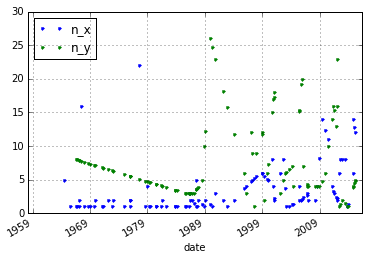

In [194]:
m = caine_ranks.merge(dench_ranks, how='outer',
                      left_index=True, right_index=True)
m = m.interpolate('slinear')
m.plot(style='.')

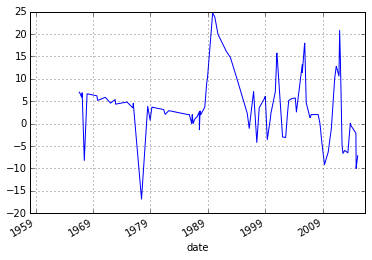

In [198]:
(m.n_y - m.n_x).plot()